In [ ]:
import pandas as pd

df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
import plotly.express as px

fig = px.histogram(df, x="Glucose", color="Outcome", nbins=30,
                   title="Distribution of Glucose by Diabetes Outcome",
                   barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()


In [ ]:
for col in ['Glucose', 'BMI', 'Age', 'Insulin']:
    fig = px.box(df, x="Outcome", y=col, color="Outcome",
                 title=f"{col} Distribution by Diabetes Outcome")
    fig.show()


In [ ]:
fig = px.scatter_matrix(df,
                        dimensions=["Glucose", "BMI", "Age", "Insulin"],
                        color="Outcome",
                        title="Scatter Matrix of Key Features")
fig.update_traces(diagonal_visible=False)
fig.show()


In [ ]:
import plotly.figure_factory as ff

corr = df.corr().round(2)
z = corr.values
x = list(corr.columns)
y = list(corr.index)

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='RdBu', showscale=True)
fig.update_layout(title="Correlation Heatmap")
fig.show()


In [ ]:
#Strongest correlations with Outcome: Glucose, BMI, and Age

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100],
                        labels=['20-30','31-40','41-50','51-60','60+'])

fig = px.histogram(df, x='AgeGroup', color='Outcome', barmode='group',
                   title='Diabetes Outcome by Age Group')
fig.show()


In [ ]:
#Young age group (20–30) has the lowest diabetes rate

<Axes: xlabel='Outcome', ylabel='count'>

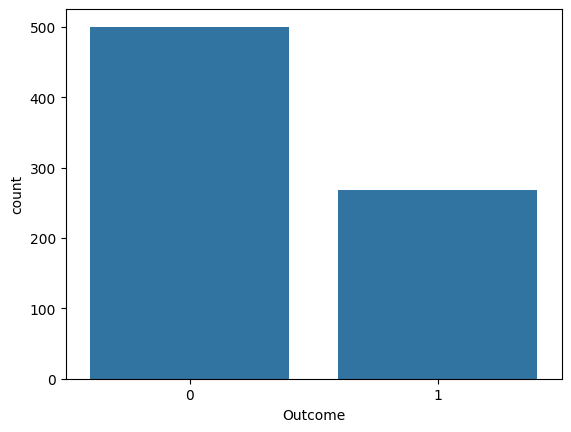

In [ ]:
import seaborn as sns
sns.countplot(x='Outcome', data=df)

<Axes: xlabel='Age', ylabel='Count'>

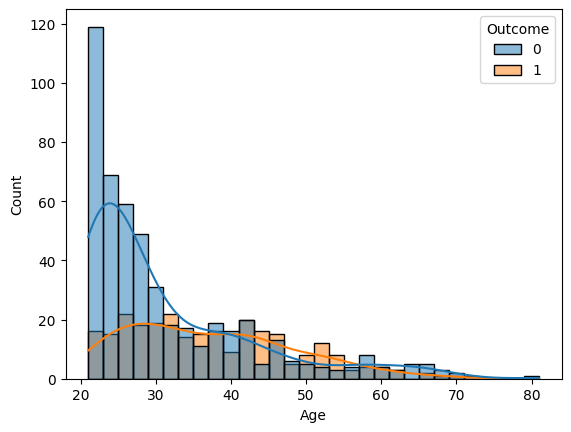

In [ ]:
sns.histplot(data=df, x='Age', hue='Outcome', kde=True, bins=30)


<Axes: xlabel='Glucose', ylabel='BMI'>

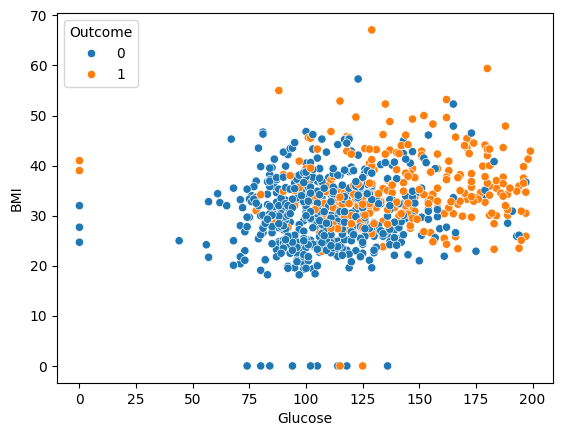

In [ ]:
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')


In [ ]:
#High BMI + High Glucose correlates with diabetes.

In [ ]:
import matplotlib.pyplot as plt


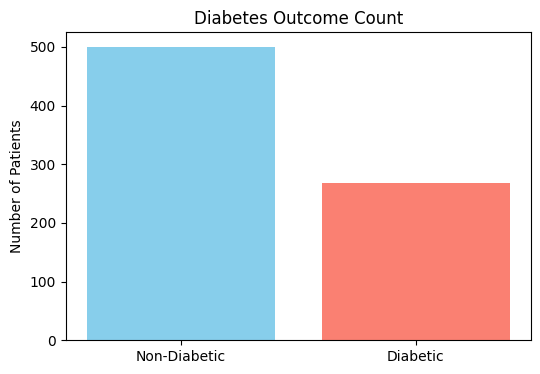

In [ ]:
outcome_counts = df['Outcome'].value_counts()


plt.figure(figsize=(6, 4))
plt.bar(['Non-Diabetic', 'Diabetic'], outcome_counts, color=['skyblue', 'salmon'])
plt.title('Diabetes Outcome Count')
plt.ylabel('Number of Patients')
plt.show()

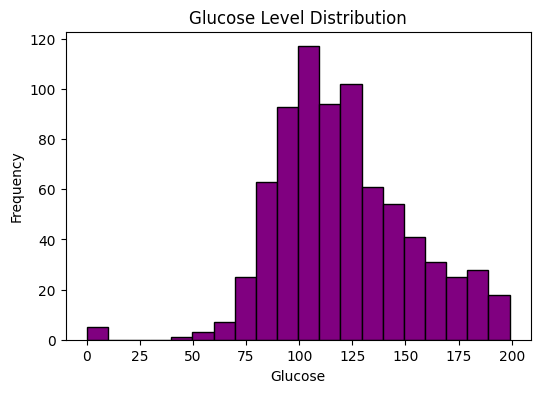

In [ ]:
#Histogram of Glucose Levels

plt.figure(figsize=(6, 4))
plt.hist(df['Glucose'], bins=20, color='purple', edgecolor='black')
plt.title('Glucose Level Distribution')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

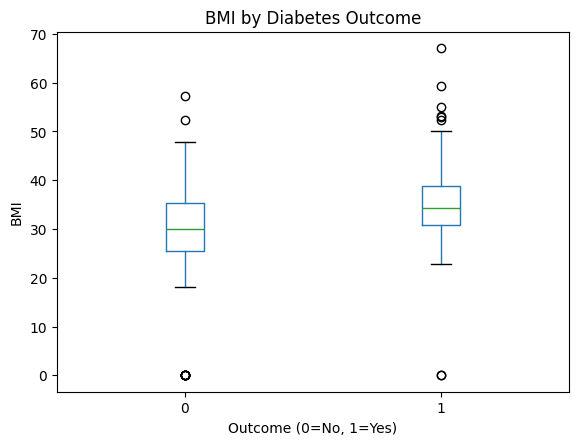

In [ ]:
#Boxplot of BMI Grouped by Outcome

df.boxplot(column='BMI', by='Outcome', grid=False)
plt.title('BMI by Diabetes Outcome')
plt.suptitle('')  # remove default title
plt.xlabel('Outcome (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.show()

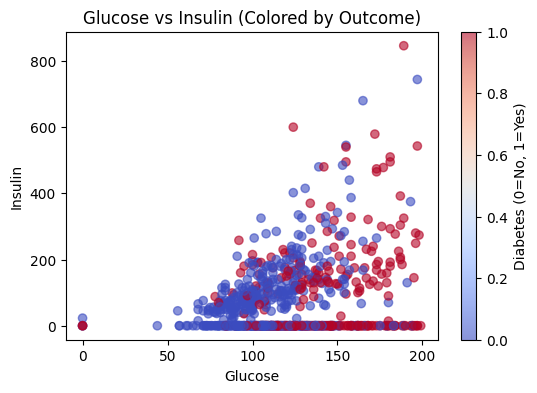

In [ ]:
#Scatter Plot: Glucose vs. Insulin

plt.figure(figsize=(6, 4))
plt.scatter(df['Glucose'], df['Insulin'], c=df['Outcome'], cmap='coolwarm', alpha=0.6)
plt.title('Glucose vs Insulin (Colored by Outcome)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.colorbar(label='Diabetes (0=No, 1=Yes)')
plt.show()

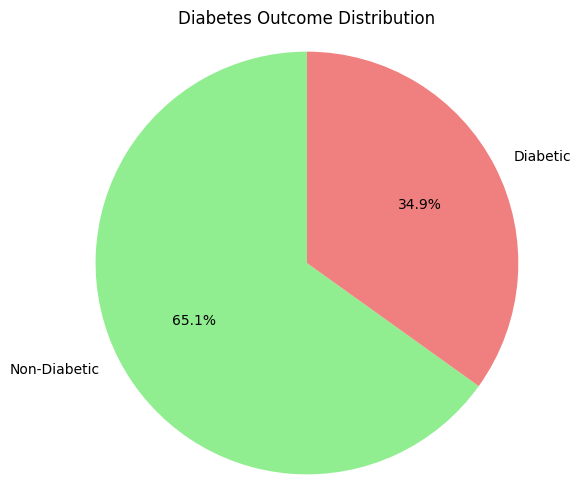

In [ ]:

outcome_counts = df['Outcome'].value_counts()


labels = ['Non-Diabetic', 'Diabetic']
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Diabetes Outcome Distribution')
plt.axis('equal')
plt.show()